# Task
Fetch and plot historical price data for Apple stock and other relevant financial indicators.

## Fetch financial time series data

### Subtask:
Fetch historical price data for Apple stock and other relevant financial indicators.


**Reasoning**:
The first step is to import the necessary library and define the ticker symbol and date range. Then, use the yfinance library to download the historical data for Apple stock within the specified date range.



In [52]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Apple stock
ticker_symbol = 'AAPL'

# Define the start and end dates for the historical data
start_date = '2020-01-01'
end_date = '2023-12-31'

# Download the historical data
aapl_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
display(aapl_data.head())

/tmp/ipython-input-2670902034.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538498,72.598876,71.292289,71.545875,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
2020-01-07,72.065132,72.671325,71.845354,72.415322,108872000
2020-01-08,73.224426,73.526318,71.768101,71.768101,132079200


## Visualize the data

### Subtask:
Plot the fetched time series data to understand the trends and patterns.


**Reasoning**:
Plot the 'Close' price and 'Volume' from the `aapl_data` DataFrame in two separate subplots to visualize trends and patterns.



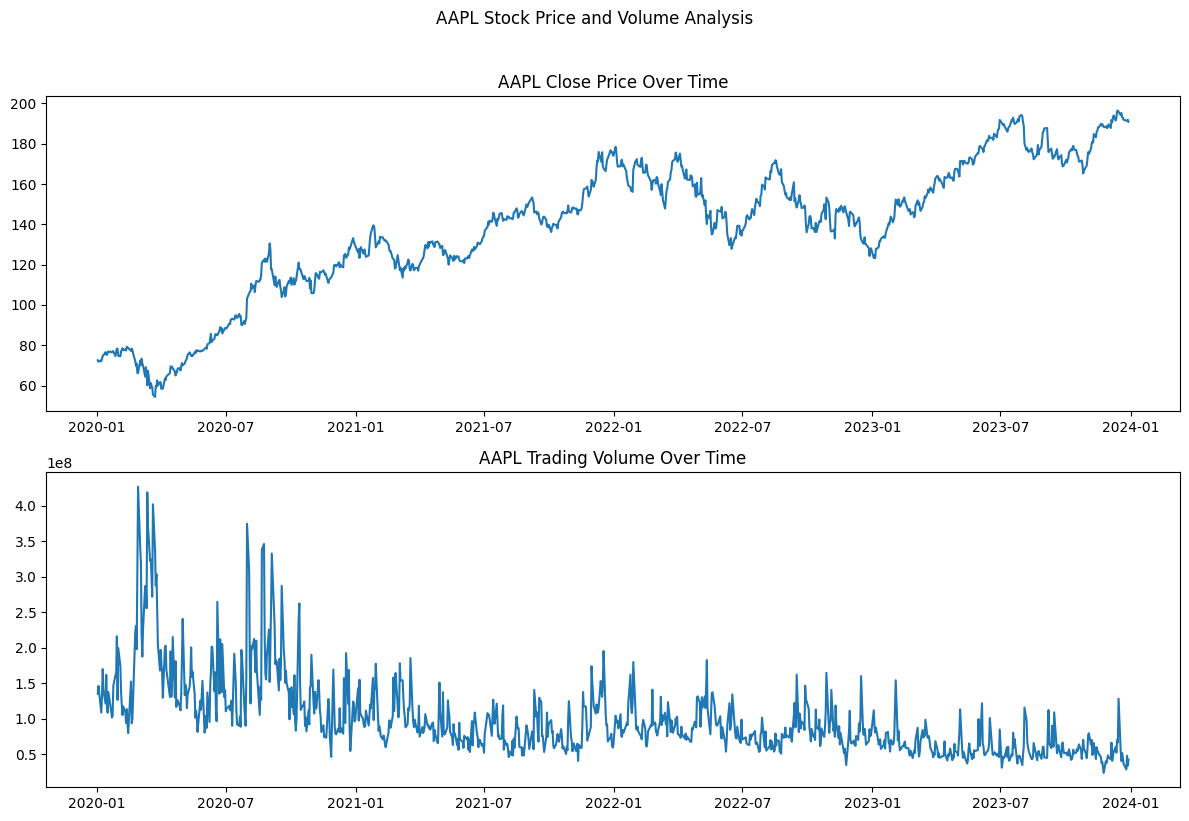

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(aapl_data.index, aapl_data['Close'])
axes[0].set_title('AAPL Close Price Over Time')

axes[1].plot(aapl_data.index, aapl_data['Volume'])
axes[1].set_title('AAPL Trading Volume Over Time')

fig.suptitle('AAPL Stock Price and Volume Analysis', y=1.02)
plt.tight_layout()
plt.show()

## Prepare data for modeling

### Subtask:
Engineer features from the time series data and split the data into training and testing sets.


**Reasoning**:
Engineer features from the time series data, define the target variable, handle missing values, and split the data into training and testing sets.



In [54]:
# 1. Create new features
aapl_data['50_day_moving_average'] = aapl_data['Close'].rolling(window=50).mean()
aapl_data['200_day_moving_average'] = aapl_data['Close'].rolling(window=200).mean()
aapl_data['daily_price_change'] = aapl_data['Close'] - aapl_data['Close'].shift(1)
aapl_data['daily_percentage_change'] = aapl_data['Close'].pct_change()

# 2. Define the target variable (next day's closing price)
aapl_data['target'] = aapl_data['Close'].shift(-1)

# 3. Handle missing values (drop rows with NaN values introduced by feature engineering)
# Drop NaNs before splitting the data
aapl_data.dropna(inplace=True)


# 4. Split the data into training and testing sets
# Splitting based on a date (e.g., end of 2022)
split_date = '2022-11-30'
train_data = aapl_data[aapl_data.index <= split_date]
test_data = aapl_data[aapl_data.index > split_date]

# 5. Separate features (X) and target (y)
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

# Flatten the MultiIndex in X_test
# X_test.columns = X_test.columns.get_level_values(0) # Reverted this change

print("Shape of train_data:", train_data.shape)
print("Shape of test_data:", test_data.shape)


display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

Shape of train_data: (536, 10)
Shape of test_data: (270, 10)


Price,Close,High,Low,Open,Volume,50_day_moving_average,200_day_moving_average,daily_price_change,daily_percentage_change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2020-10-15,117.416771,117.893401,114.926616,115.481064,112559200,113.729093,85.965762,-0.466896,-0.003961
2020-10-16,115.772865,118.233847,115.568595,117.971210,115393800,113.832639,86.181934,-1.643906,-0.014001
2020-10-19,112.815819,117.134681,112.504549,116.687232,120639300,113.927333,86.386847,-2.957047,-0.025542
2020-10-20,114.304062,115.733958,112.475348,113.029797,124423700,114.020374,86.596339,1.488243,0.013192
2020-10-21,113.681549,115.471347,113.273002,113.487001,89946000,114.166185,86.804421,-0.622513,-0.005446


,target
Date,
2020-10-15,115.772865
2020-10-16,112.815819
2020-10-19,114.304062
2020-10-20,113.681549
2020-10-21,112.592079


Price,Close,High,Low,Open,Volume,50_day_moving_average,200_day_moving_average,daily_price_change,daily_percentage_change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2022-12-01,146.247452,147.056055,144.571097,146.148852,71250400,143.674548,151.530039,0.276108,0.001892
2022-12-02,145.754410,145.941770,143.624445,143.930147,65447400,143.582308,151.411891,-0.493042,-0.003371
2022-12-05,144.590820,148.821153,143.742780,145.714966,68826400,143.512279,151.305938,-1.163589,-0.007983
2022-12-06,140.922546,145.251494,139.946309,145.024697,64727200,143.362189,151.189399,-3.668274,-0.025370
2022-12-07,138.979950,141.376149,138.053020,140.212566,69721100,143.153755,151.077773,-1.942596,-0.013785


,target
Date,
2022-12-01,145.754410
2022-12-02,144.590820
2022-12-05,140.922546
2022-12-06,138.979950
2022-12-07,140.666168


## Build predictive models

### Subtask:
Develop two different predictive models for the stock price.


**Reasoning**:
Import the necessary libraries for building predictive models and instantiate two different regression models, then train each model using the X_train and y_train data and store them in separate variables.



In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Instantiate two different regression models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train each model using the X_train and y_train data
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

print("Linear Regression model trained.")
print("Random Forest Regressor model trained.")

Linear Regression model trained.
Random Forest Regressor model trained.


## Implement a simple trading strategy

### Subtask:
Create a trading strategy based on the predictions of the models.


**Reasoning**:
Generate predictions using the trained models and create trading signals based on these predictions.



## Evaluate model accuracy

### Subtask:
Evaluate the performance of the predictive models using appropriate metrics and visualize the predicted vs. actual prices.

**Reasoning**:
Generate predictions using the trained models on the test data, calculate the Mean Squared Error (MSE) and R-squared for each model to evaluate their accuracy, and plot the actual prices against the predicted prices for both models to visualize their performance.

Linear Regression Model:
  Mean Squared Error (MSE): 5.16
  R-squared (R2): 0.99
Random Forest Regressor Model:
  Mean Squared Error (MSE): 85.68
  R-squared (R2): 0.77


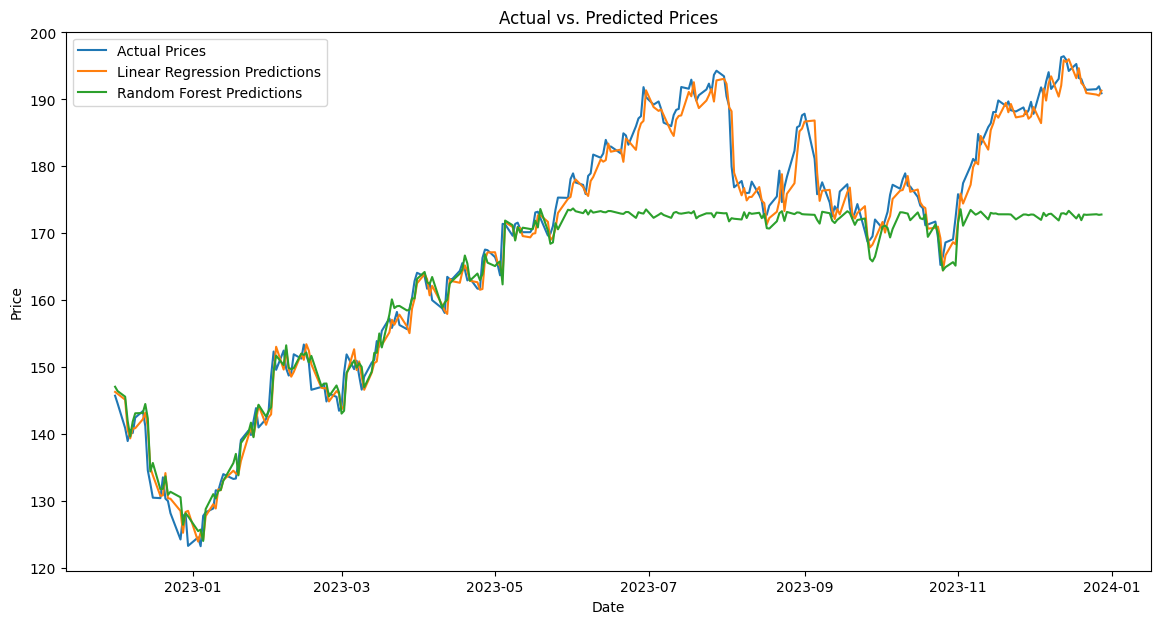

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate Linear Regression model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression Model:")
print(f"  Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"  R-squared (R2): {lr_r2:.2f}")

# Evaluate Random Forest Regressor model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest Regressor Model:")
print(f"  Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"  R-squared (R2): {rf_r2:.2f}")

# Plot actual vs. predicted prices
plt.figure(figsize=(14, 7))

plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, lr_predictions, label='Linear Regression Predictions')
plt.plot(y_test.index, rf_predictions, label='Random Forest Predictions')

plt.title('Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Implement a simple trading strategy

### Subtask:
Create a trading strategy based on the predictions of the models.

**Reasoning**:
Generate trading signals based on the predictions of each model. A simple strategy is to buy if the predicted price is higher than the current closing price and sell otherwise.

In [57]:
# Create a DataFrame to store trading signals
trading_signals = pd.DataFrame(index=X_test.index)

# Convert predictions to pandas Series with the same index as X_test
lr_predictions_series = pd.Series(lr_predictions, index=X_test.index)
rf_predictions_series = pd.Series(rf_predictions, index=X_test.index)

# Access the 'Close' price correctly from the MultiIndex DataFrame
X_test_close = X_test[('Close', 'AAPL')]


# Generate trading signals for Linear Regression model
trading_signals['LR_Signal'] = 0
trading_signals.loc[lr_predictions_series > X_test_close, 'LR_Signal'] = 1 # Buy signal if predicted price is higher than current close
trading_signals.loc[lr_predictions_series < X_test_close, 'LR_Signal'] = -1 # Sell signal if predicted price is lower than current close

# Generate trading signals for Random Forest Regressor model
trading_signals['RF_Signal'] = 0
trading_signals.loc[rf_predictions_series > X_test_close, 'RF_Signal'] = 1 # Buy signal if predicted price is higher than current close
trading_signals.loc[rf_predictions_series < X_test_close, 'RF_Signal'] = -1 # Sell signal if predicted price is lower than current close


display(trading_signals.head())

,LR_Signal,RF_Signal
Date,,
2022-12-01,1,1
2022-12-02,1,1
2022-12-05,1,1
2022-12-06,-1,1
2022-12-07,1,1


## Evaluate trading strategy returns

### Subtask:
Backtest the trading strategies and calculate their financial returns.

**Reasoning**:
Calculate the daily returns based on the trading signals and the actual price changes, then compute the cumulative returns for each strategy to evaluate their performance over time.

In [58]:
# Calculate daily returns based on signals
trading_returns = trading_signals.copy()
trading_returns['LR_Returns'] = trading_signals['LR_Signal'].shift(1) * X_test['daily_percentage_change']
trading_returns['RF_Returns'] = trading_signals['RF_Signal'].shift(1) * X_test['daily_percentage_change']

# Calculate cumulative returns
trading_returns['LR_Cumulative_Returns'] = (1 + trading_returns['LR_Returns']).cumprod()
trading_returns['RF_Cumulative_Returns'] = (1 + trading_returns['RF_Returns']).cumprod()

display(trading_returns.head())
display(trading_returns.tail())

,LR_Signal,RF_Signal,LR_Returns,RF_Returns,LR_Cumulative_Returns,RF_Cumulative_Returns
Date,,,,,,
2022-12-01,1,1,NaN,NaN,NaN,NaN
2022-12-02,1,1,-0.003371,-0.003371,0.996629,0.996629
2022-12-05,1,1,-0.007983,-0.007983,0.988672,0.988672
2022-12-06,-1,1,-0.025370,-0.025370,0.963590,0.963590
2022-12-07,1,1,0.013785,-0.013785,0.976873,0.950307


,LR_Signal,RF_Signal,LR_Returns,RF_Returns,LR_Cumulative_Returns,RF_Cumulative_Returns
Date,,,,,,
2023-12-21,-1,-1,0.000770,0.000770,0.870474,1.127559
2023-12-22,-1,-1,0.005547,0.005547,0.875303,1.133814
2023-12-26,-1,-1,0.002841,0.002841,0.877790,1.137035
2023-12-27,-1,-1,-0.000518,-0.000518,0.877335,1.136446
2023-12-28,-1,-1,-0.002226,-0.002226,0.875382,1.133916


## Compare accuracy and returns

### Subtask:
Analyze and compare the model accuracies with the trading strategy returns to highlight the potential differences.

**Reasoning**:
Present the previously calculated model accuracies (MSE and R-squared) and the cumulative returns of the trading strategies. Discuss the relationship between these metrics, highlighting that high model accuracy does not always translate to high financial returns in trading, and vice versa.

In [59]:
print("Model Accuracy:")
print(f"Linear Regression Model:")
print(f"  Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"  R-squared (R2): {lr_r2:.2f}")
print(f"Random Forest Regressor Model:")
print(f"  Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"  R-squared (R2): {rf_r2:.2f}")
print("\nTrading Strategy Cumulative Returns:")
print(f"Linear Regression Strategy Cumulative Returns: {trading_returns['LR_Cumulative_Returns'].iloc[-1]:.2f}")
print(f"Random Forest Strategy Cumulative Returns: {trading_returns['RF_Cumulative_Returns'].iloc[-1]:.2f}")

Model Accuracy:
Linear Regression Model:
  Mean Squared Error (MSE): 5.16
  R-squared (R2): 0.99
Random Forest Regressor Model:
  Mean Squared Error (MSE): 85.68
  R-squared (R2): 0.77

Trading Strategy Cumulative Returns:
Linear Regression Strategy Cumulative Returns: 0.88
Random Forest Strategy Cumulative Returns: 1.13


## Finish task

Summarize the findings from the analysis, emphasizing the difference between model accuracy and trading strategy returns. Discuss the implications of these findings for quantitative trading.